### Importing necessary libraries

In [2]:
# Import numerical computing library
import numpy as np

# Import data manipulation library
import pandas as pd

# Import plotting library
import matplotlib.pyplot as plt

# Import data visualization library
import seaborn as sns

### 2. Data Preparation
### a. Import the dataset 

In [25]:
# loading the dataset
df = pd.read_csv('../data/Customer Service_Requests_from_2010_to_Present.csv', low_memory=False)

### b. Provide your insight on the information and details that the provided dataset carries.

In [28]:
# Checking the number of rows and columns in the dataset
df.shape

(300698, 53)

In [30]:
# Displaying all column names to understand available data fields
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [32]:
# Getting detailed info about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [33]:
# Previewing the first 5 rows to get a sense of the actual data structure and content
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


### c. Convert the columns "Created Date" and "Closed Date" to datetime datatype and create a new column
### "Request_Closing_Time" as the   time elapsed between request creation and request closing

In [37]:
# Convert columns to datetime
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce', format='mixed')
df['Closed Date'] = pd.to_datetime(df['Closed Date'], errors='coerce', format='mixed')

# Create Request_Closing_Time in hours
df['Request_Closing_Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds() / 3600

# Preview
df[['Created Date', 'Closed Date', 'Request_Closing_Time']].head()

,Created Date,Closed Date,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,0.920833
1,2015-12-31 23:59:44,2016-01-01 01:26:00,1.437778
2,2015-12-31 23:59:29,2016-01-01 04:51:00,4.858611
3,2015-12-31 23:57:46,2016-01-01 07:43:00,7.753889
4,2015-12-31 23:56:58,2016-01-01 03:24:00,3.450556


### d. Write a python program to drop irrelevant Columns which are listed below.

In [39]:
# Columns to drop
columns_to_drop = [
    'Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2',
    'Intersection Street 1', 'Intersection Street 2','Address Type','Park Facility Name',
    'Park Borough','School Name', 'School Number','School Region','School Code',
    'School Phone Number','School Address','School City','School State','School Zip',
    'School Not Found','School or Citywide Complaint','Vehicle Type', 'Taxi Company Borough',
    'Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp',
    'Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name',
    'Landmark','X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date',
    'Resolution Action Updated Date','Community Board','Facility Type','Location'
]

# Dropping irrelevant columns
df = df.drop(columns=columns_to_drop)

In [40]:
df

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0.920833
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,1.437778
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,4.858611
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,7.753889
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,3.450556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,NaN,Open,Your complaint has been forwarded to the New Y...,Unspecified,NaN,NaN,NaN
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,RICHMOND HILL,Closed,The Police Department responded and upon arriv...,QUEENS,40.694077,-73.846087,2.008611
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,BROOKLYN,Closed,The Police Department responded to the complai...,BROOKLYN,40.699590,-73.944234,3.121389
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.837708,-73.834587,4.092500


### e. Write a python program to remove the NaN missing values from updated dataframe.

In [42]:
# Dropoing rows with any NaN values
df = df.dropna()

# Check for any remaining missing values
df.isnull().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Status                    0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
Request_Closing_Time      0
dtype: int64

In [43]:
df

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0.920833
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,1.437778
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,4.858611
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,7.753889
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,3.450556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300692,30281370,2015-03-29 00:34:32,2015-03-29 01:13:01,NYPD,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,NEW YORK,Closed,The Police Department responded to the complai...,MANHATTAN,40.716053,-73.991378,0.641389
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,RICHMOND HILL,Closed,The Police Department responded and upon arriv...,QUEENS,40.694077,-73.846087,2.008611
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,BROOKLYN,Closed,The Police Department responded to the complai...,BROOKLYN,40.699590,-73.944234,3.121389
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.837708,-73.834587,4.092500


### f. Write a python program to see the unique values from all the columns in the dataframe.

In [45]:
# Printing unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"\nColumn: {column}")
    print(f"Number of unique values: {unique_values}")


Column: Unique Key
Number of unique values: [32310363 32309934 32309159 ... 30283424 30280004 30281825]

Column: Created Date
Number of unique values: <DatetimeArray>
['2015-12-31 23:59:45', '2015-12-31 23:59:44', '2015-12-31 23:59:29',
 '2015-12-31 23:57:46', '2015-12-31 23:56:58', '2015-12-31 23:56:30',
 '2015-12-31 23:55:32', '2015-12-31 23:54:05', '2015-12-31 23:53:58',
 '2015-12-31 23:52:58',
 ...
 '2015-03-29 00:42:48', '2015-03-29 00:37:15', '2015-03-29 00:35:28',
 '2015-03-29 00:35:23', '2015-03-29 00:35:04', '2015-03-29 00:34:32',
 '2015-03-29 00:33:28', '2015-03-29 00:33:03', '2015-03-29 00:33:02',
 '2015-03-29 00:33:01']
Length: 251970, dtype: datetime64[ns]

Column: Closed Date
Number of unique values: <DatetimeArray>
['2016-01-01 00:55:00', '2016-01-01 01:26:00', '2016-01-01 04:51:00',
 '2016-01-01 07:43:00', '2016-01-01 03:24:00', '2016-01-01 01:50:00',
 '2016-01-01 01:53:00', '2016-01-01 01:42:00', '2016-01-01 08:27:00',
 '2016-01-01 01:17:00',
 ...
 '2015-03-29 00:57:2

### 3. Data Analysis
### a. Write a Python program to show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of the data frame.

### Sum

In [48]:
# Calculating Sum
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Unique Key'])
numeric_df.sum()

Incident Zip            3.160833e+09
Latitude                1.185553e+07
Longitude              -2.152010e+07
Request_Closing_Time    1.254358e+06
dtype: float64

### Mean

In [50]:
# Calculating Mean

numeric_df.mean()

Incident Zip            10857.977349
Latitude                   40.725681
Longitude                 -73.925035
Request_Closing_Time        4.308926
dtype: float64

### Standard Deviation

In [52]:
# Calculating Standard Deviation

numeric_df.std()

Incident Zip            580.280774
Latitude                  0.082411
Longitude                 0.078654
Request_Closing_Time      6.062641
dtype: float64

### Skewness

In [54]:
# Calculating Skewness

numeric_df.skew()

Incident Zip            -2.553956
Latitude                 0.123114
Longitude               -0.312739
Request_Closing_Time    14.299525
dtype: float64

### Kurtosis

In [56]:
# Calculating Kurtosis

numeric_df.kurtosis()

Incident Zip             37.827777
Latitude                 -0.734818
Longitude                 1.455600
Request_Closing_Time    849.777081
dtype: float64

### b. Write a Python program to calculate and show correlation of all variables.

In [69]:
# Calculating correlation matrix
corr_matrix = numeric_df.corr()

print("\nCorrelation Matrix:")
corr_matrix


Correlation Matrix:


,Incident Zip,Latitude,Longitude,Request_Closing_Time
Incident Zip,1.000000,-0.499081,0.385934,0.057182
Latitude,-0.499081,1.000000,0.368819,0.024497
Longitude,0.385934,0.368819,1.000000,0.109724
Request_Closing_Time,0.057182,0.024497,0.109724,1.000000


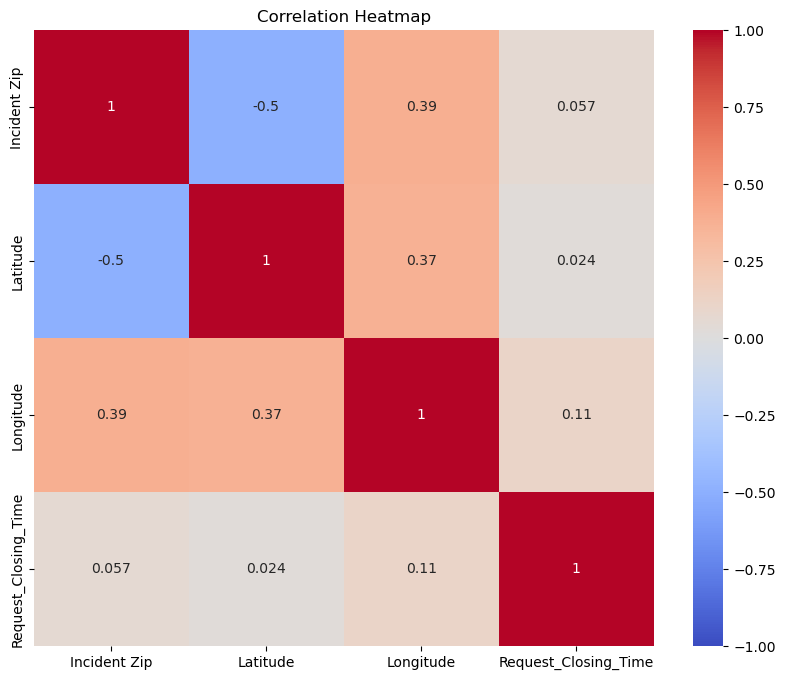

In [71]:
# Visualizing the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

### 4. Data Exploration
### a. Provide four major insights through visualization that you come up after data mining.

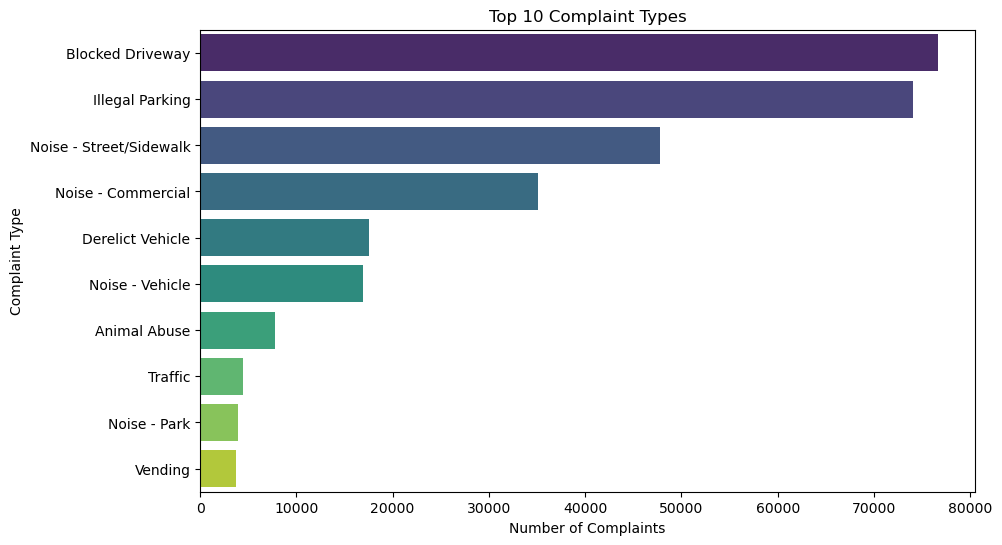

In [74]:
#  Top Complaint Types

# Count the number of complaints by type and select the top 10 most frequent complaint types
top_complaints = df['Complaint Type'].value_counts().head(10)

# Visualizing the data with bar plot showing the top 10 complaint types
plt.figure(figsize=(10, 6))
sns.barplot(x=top_complaints.values, y=top_complaints.index, hue=top_complaints.index, palette="viridis", dodge=False, legend=False)
plt.title('Top 10 Complaint Types')
plt.xlabel('Number of Complaints')
plt.ylabel('Complaint Type')
plt.show()

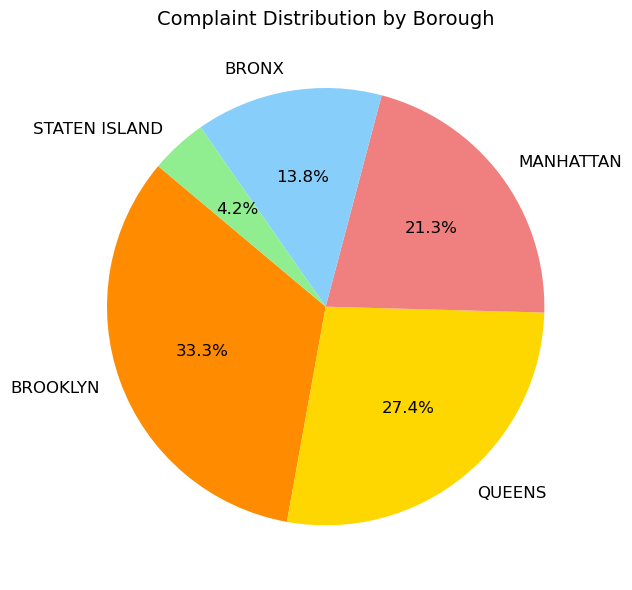

In [101]:
# Complaints by Borough

plt.figure(figsize=(10, 6))
borough_counts = df['Borough'].value_counts()
colors = ['darkorange', 'gold', 'lightcoral', 'lightskyblue', 'lightgreen']

plt.pie(borough_counts, 
        labels=borough_counts.index,
        autopct='%1.1f%%', 
        startangle=140,
        colors=colors,
        textprops={'fontsize': 12})

plt.title('Complaint Distribution by Borough', fontsize=14)
plt.tight_layout()
plt.show()

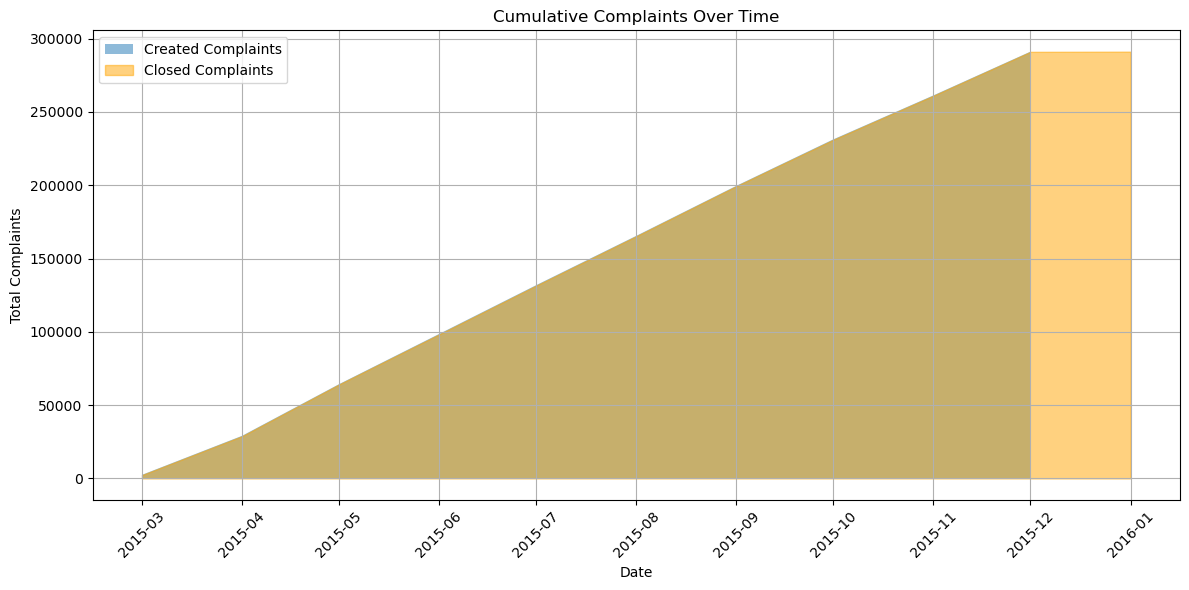

In [119]:
# Resample to monthly counts
created_ts = df['Created Date'].dt.to_period('M').value_counts().sort_index()
closed_ts = df['Closed Date'].dt.to_period('M').value_counts().sort_index()

# Convert to datetime for plotting
created_ts.index = created_ts.index.to_timestamp()
closed_ts.index = closed_ts.index.to_timestamp()

# Cumulative sums
cumulative_created = created_ts.cumsum()
cumulative_closed = closed_ts.cumsum()

# Area Plot
plt.figure(figsize=(12, 6))
plt.fill_between(cumulative_created.index, cumulative_created.values, alpha=0.5, label='Created Complaints')
plt.fill_between(cumulative_closed.index, cumulative_closed.values, alpha=0.5, label='Closed Complaints', color='orange')

plt.title("Cumulative Complaints Over Time")
plt.xlabel("Date")
plt.ylabel("Total Complaints")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

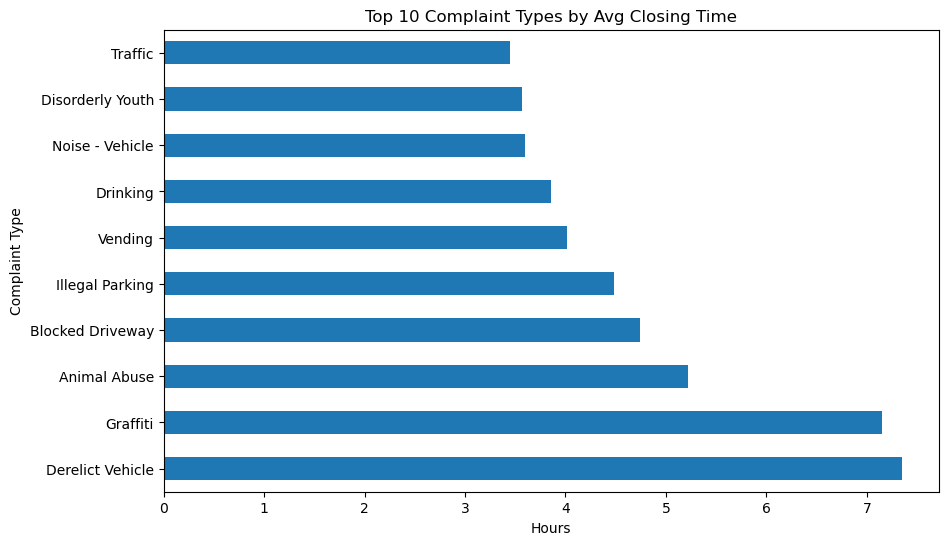

In [121]:
# Average Closing Time by Complaint Type
avg_closing_time = df.groupby('Complaint Type')['Request_Closing_Time'].mean().sort_values(ascending=False).head(10)

# Plotting a bar chart of the top 10 complaint types with the highest average closing time
avg_closing_time.plot(kind='barh', figsize=(10,6), title='Top 10 Complaint Types by Avg Closing Time')
plt.xlabel('Hours')
plt.show()


### b. Arrange the complaint types according to their average 'Request_Closing_Time', categorized by various locations. 
###  Illustrate it through graph as well.

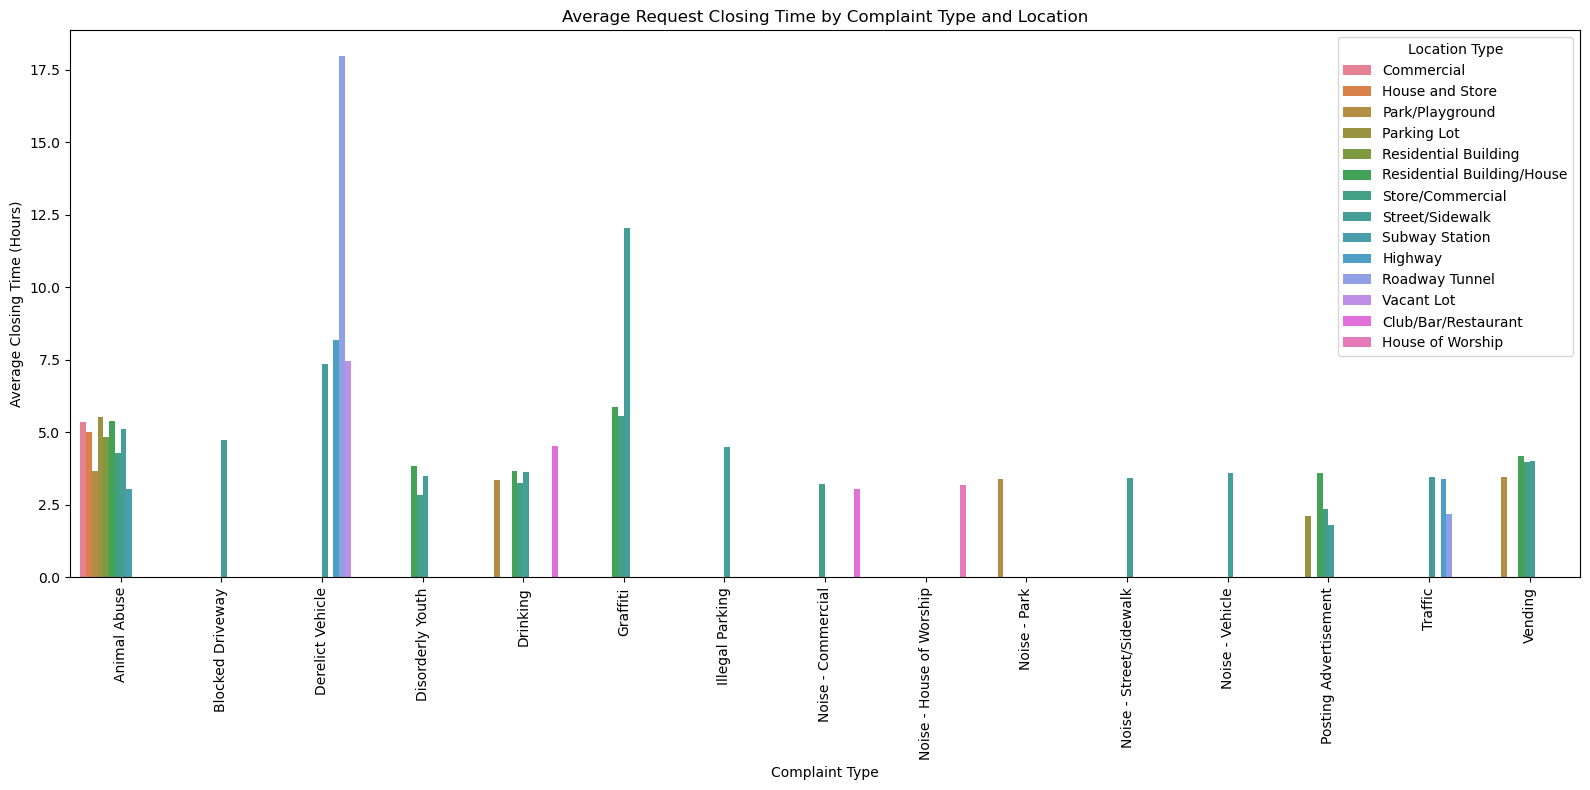

In [124]:
grouped_df = df.groupby(['Complaint Type', 'Location Type'])['Request_Closing_Time'].mean().reset_index()

# Plotting average closing time by complaint type and location type
plt.figure(figsize=(16, 8))
sns.barplot(data=grouped_df, x='Complaint Type', y='Request_Closing_Time', hue='Location Type')
plt.xticks(rotation=90)
plt.title('Average Request Closing Time by Complaint Type and Location')
plt.ylabel('Average Closing Time (Hours)')
plt.xlabel('Complaint Type')
plt.legend(title='Location Type')
plt.tight_layout()
plt.show()

### 5. Statistical Testing
### a. Test 1: Whether the average response time across complaint types is similar or not.
### ● State the Null Hypothesis (H0) and Alternate Hypothesis (H1).
### ● Perform the statistical test and provide the p-value.
### ● Interpret the results to accept or reject the Null Hypothesis.

In [127]:
from scipy.stats import f_oneway

# Group response times by Complaint Type
samples = [group['Request_Closing_Time'].dropna() for name, group in df.groupby('Complaint Type')]

# Apply one-way ANOVA
f_stat, p_value = f_oneway(*samples)

# Results
print("F-statistic:", f_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("We reject the Null Hypothesis, indicating that the average response times vary significantly between complaint types.")
else:
    print("We fail to reject the Null Hypothesis, indicating no significant difference in average response times among complaint types.")


F-statistic: 578.9120337398356
P-value: 0.0
We reject the Null Hypothesis, indicating that the average response times vary significantly between complaint types.


### b. Test 2: Whether the type of complaint or service requested and location are related.
### ● State the Null Hypothesis (H0) and Alternate Hypothesis (H1).
### ● Perform the statistical test and provide the p-value.
### ● Interpret the results to accept or reject the Null Hypothesis.

In [130]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create the contingency table
contingency_table = pd.crosstab(df['Complaint Type'], df['Location Type'])

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("We reject the Null Hypothesis: There is a significant relationship between complaint type and location.")
else:
    print("We fail to reject the Null Hypothesis: No significant relationship between complaint type and location.")


Chi-Square Statistic: 1049203.872020897
P-value: 0.0
We reject the Null Hypothesis: There is a significant relationship between complaint type and location.
